1. Import & Clean Data

In [3]:
%pip install pandas
import pandas as pd

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
ds1 = pd.read_csv("Unemployment in India.csv")
ds2 = pd.read_csv("Unemployment_Rate_upto_11_2020.csv")


In [7]:
ds1.head(5)
ds2.head(5)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [8]:
# Clean column names
ds1.columns = ds1.columns.str.strip()
ds2.columns = ds2.columns.str.strip()

In [ ]:
# Drop rows with missing values
ds1_clean = ds1.dropna()
ds2_clean = ds2.copy()

In [10]:
# Select relevant columns
columns_to_use = ['Region', 'Date', 'Estimated Unemployment Rate (%)', 
                  'Estimated Employed', 'Estimated Labour Participation Rate (%)']
ds1_clean = ds1_clean[columns_to_use]
ds2_clean = ds2_clean[columns_to_use]

In [11]:
# Combine datasets
ds_combined = pd.concat([ds1_clean, ds2_clean], ignore_index=True)
ds_combined.sort_values('Date', inplace=True)

2. Unemployment Trend Visualization

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

In [14]:
monthly_trend = ds_combined.groupby('Date')['Estimated Unemployment Rate (%)'].mean().reset_index()

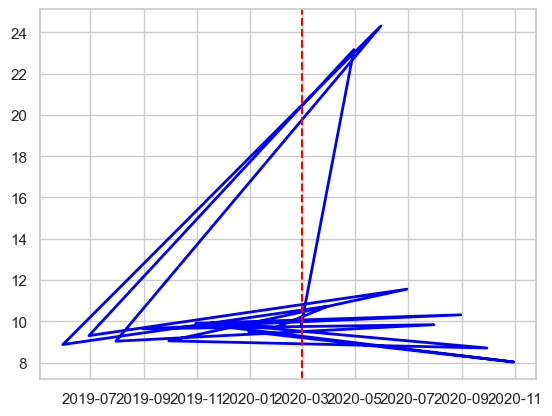

In [16]:
# Convert 'Date' column to datetime for proper plotting
monthly_trend['Date'] = pd.to_datetime(monthly_trend['Date'], dayfirst=True)

plt.plot(monthly_trend['Date'], monthly_trend['Estimated Unemployment Rate (%)'], color='blue', linewidth=2)
plt.axvline(pd.to_datetime("2020-03-01"), color='red', linestyle='--', label='COVID-19 Start (Mar 2020)')

Text(0, 0.5, 'Estimated Unemployment Rate (%)')

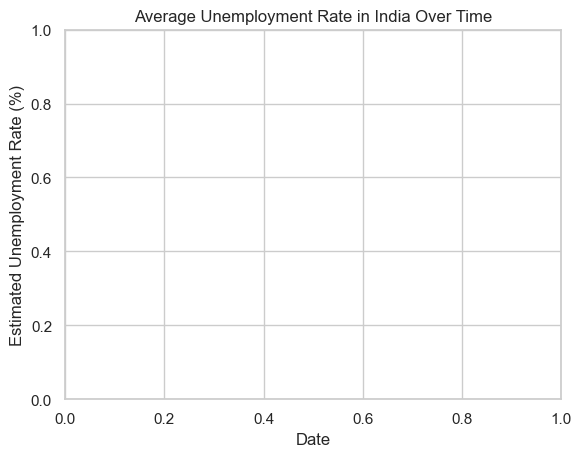

In [17]:
plt.title("Average Unemployment Rate in India Over Time")
plt.xlabel("Date")
plt.ylabel("Estimated Unemployment Rate (%)")

C:\Users\binte\AppData\Local\Temp\ipykernel_11152\2938215911.py:1: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


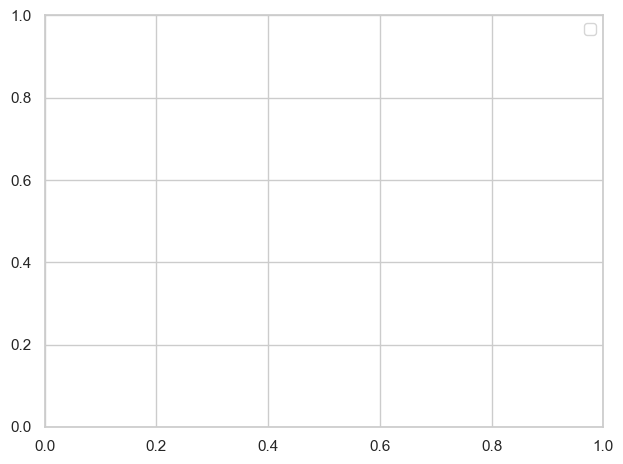

In [18]:
plt.legend()
plt.tight_layout()
plt.show()

3. COVID-19 Impact Analysis

In [19]:
# Compare pre and post COVID average unemployment rates
pre_covid = ds_combined[ds_combined['Date'] < '2020-03-01']
post_covid = ds_combined[ds_combined['Date'] >= '2020-03-01']

In [20]:
pre_avg = pre_covid['Estimated Unemployment Rate (%)'].mean()
post_avg = post_covid['Estimated Unemployment Rate (%)'].mean()

In [21]:
print(f"Pre-COVID Avg Unemployment Rate: {pre_avg:.2f}%")
print(f"Post-COVID Avg Unemployment Rate: {post_avg:.2f}%")

Pre-COVID Avg Unemployment Rate: 11.91%
Post-COVID Avg Unemployment Rate: nan%


4. Seasonal Pattern Detection

In [24]:
# Ensure 'Date' column is datetime, then add month column
ds_combined['Date'] = pd.to_datetime(ds_combined['Date'], dayfirst=True)
ds_combined['Month'] = ds_combined['Date'].dt.month_name()

In [25]:
# Average unemployment by month
seasonal_trend = ds_combined.groupby('Month')['Estimated Unemployment Rate (%)'].mean().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

<Axes: xlabel='Month'>

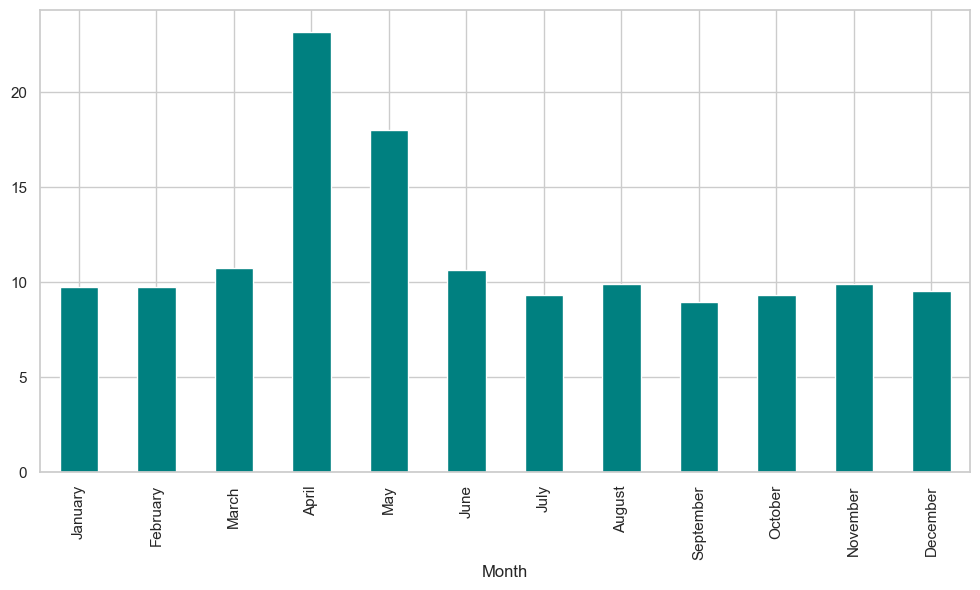

In [26]:
# Bar plot
plt.figure(figsize=(12, 6))
seasonal_trend.plot(kind='bar', color='teal')

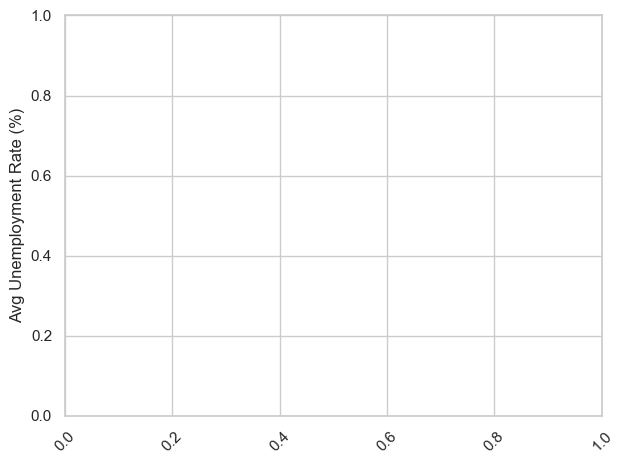

In [27]:
plt.ylabel("Avg Unemployment Rate (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

 5. Insight Summary for Policy Makers

In [29]:
print("Insights for Policy Makers:")
print("- Unemployment spiked sharply after March 2020 due to COVID-19 lockdowns.")
print("- Peak unemployment occurred in April–May 2020, requiring urgent relief measures.")
print("- Some seasonal variation exists—e.g., slightly higher unemployment in summer months.")
print("- Regions with consistently higher unemployment can be targeted for skill development programs.")

Insights for Policy Makers:
- Unemployment spiked sharply after March 2020 due to COVID-19 lockdowns.
- Peak unemployment occurred in April–May 2020, requiring urgent relief measures.
- Some seasonal variation exists—e.g., slightly higher unemployment in summer months.
- Regions with consistently higher unemployment can be targeted for skill development programs.
